##  Week 6.2: Relationships Between Variables

*  Student Name: Abraham Abate
*  Instructor: Cary Jim
*  DSC 530: Data Exploration and Analysis
*  Data Science Dept., BU
*  Date: 07/13/2024


In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
# import Libraries
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
from empiricaldist import Cdf
import random

import thinkstats2
import thinkplot

## Exercises 7.1:

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. 
* Plot percentiles of birth weight versus mother’s age. 
* Compute Pearson’s and Spearman’s correlations. 
* How would you characterize the relationship between these variables?

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [4]:
# Read NSFG data into a Pandas DataFrame.
import nsfg

preg_df = nsfg.ReadFemPreg()
preg_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [5]:
# create a variable for NSFG data (all live births)
live = preg_df[preg_df.outcome == 1]

In [6]:
# Drop NA values from birth weight and mother’s age
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [7]:
# Create a variable for weight and mother’s age
live_wt = live.totalwgt_lb
moms_ages = live.agepreg

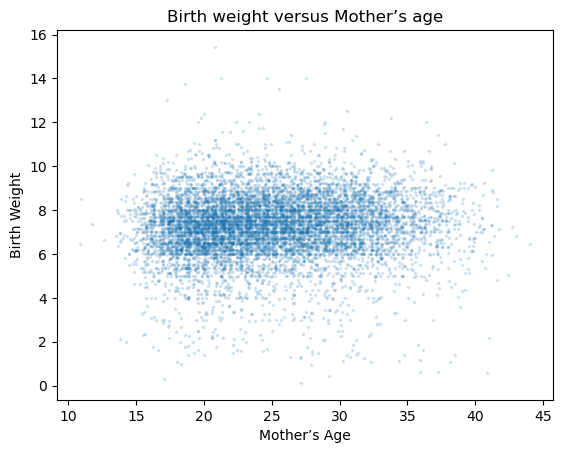

In [8]:
# create a scatter plot of birth weight versus mother’s age
plt.plot(moms_ages, live_wt, 'o', alpha=0.15, markersize=1.5)

plt.xlabel('Mother’s Age')
plt.ylabel('Birth Weight')
plt.title('Birth weight versus Mother’s age');

In [9]:
# Plot percentiles of birth weight versus mother’s age.
# First, divide the dataset into groups by age
bins = np.arange(10, 48, 3)
indices = np.digitize(preg_df.agepreg, bins)
groups = preg_df.groupby(indices)

In [10]:
# Then, print the number of respondents in each group
for i, group in groups:
    print(i, len(group))

1 20
2 393
3 1911
4 2708
5 2396
6 2065
7 1645
8 1120
9 601
10 289
11 80
12 13
13 352


In [11]:
# create variables for mean age and for cdf of weight
ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

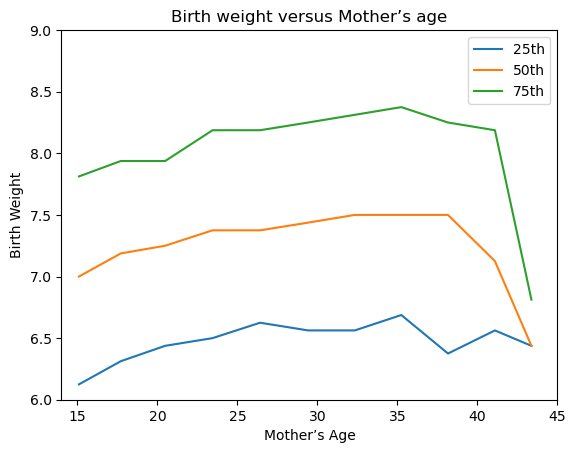

In [12]:
# extract the 25th, 50th, and 75th percentile from each group.
for percent in [25, 50, 75]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    # Plot percentiles 
    plt.plot(ages, weights, label=label)

plt.xlabel('Mother’s Age')
plt.ylabel('Birth Weight')
plt.xlim(14, 45)
plt.ylim(6, 9)
plt.title('Birth weight versus Mother’s age')
plt.legend()
plt.show()

In [13]:
# Compute Pearson’s and Spearman’s correlations.
print('Pearson correlation:', scipy.stats.pearsonr(ages, weights)[0])
print('Spearman’s correlation:',scipy.stats.spearmanr(ages, weights)[0])

Pearson correlation: -0.16205328364132163
Spearman’s correlation: 0.3133940058276483


How would you characterize the relationship between these variables?

1) The scatterplot shows a weak relationship between the variables but it is hard to see clearly.

2) The correlations support this.  Pearson's is around -0.16, Spearman's s around 0.31. The difference between them suggests some influence of outliers or a non-linear relationsip.

3) Plotting percentiles of weight versus age suggests that the relationship is non-linear.  Birth weight increases more quickly in the range of mother's age from 15 to 25.  After that, the effect is weaker.

## Exercises 8.1:

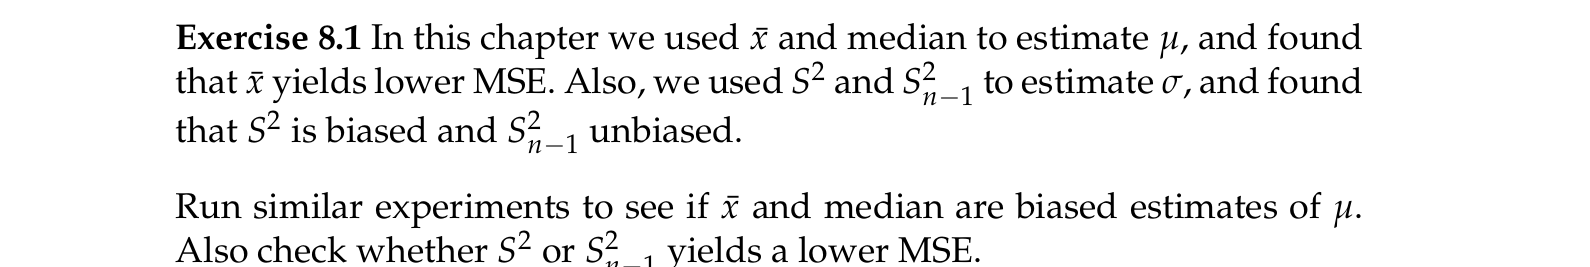

In [14]:
# pip install statistics

In [15]:
# calculate the mean birth weight and std
mean_wt = live_wt.mean()
stdv_wt = np.std(live_wt)

print('Mean wt', mean_wt)
print('STDV', stdv_wt)

Mean wt 7.265628457623368
STDV 1.4082155338406195


In [16]:
# create a function to calc Root mean squared error 
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [17]:
# simulates experiment where we try to estimate the mean of a population based on a sample with size n=20
mu = 0
sigma = 1

means = []
medians = []

iters = 100
n = 100

for _ in range(iters):
    xs = [random.gauss(mu, sigma) for _ in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median)

print('Experiment 1')
print('RSME xbar', RMSE(means, mu))
print('RSME median', RMSE(medians, mu))

Experiment 1
RSME xbar 0.09612648215861906
RSME median 0.12002598146779696


In [18]:
# simulates experiment using actual data
mu = mean_wt
sigma = stdv_wt

xbars = []
means = []
medians = []

iters = 100
n = 100

for j in range(iters):
    xs = np.random.normal(mu, sigma, n)
    xbar = np.mean(xs)
    xbars.append(xbar)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median)
    
print('Experiment 2')
print('RSME xbar2', RMSE(means, mu))
print('RSME median2', RMSE(medians, mu))

Experiment 2
RSME xbar2 0.1251957556082012
RSME median2 0.1808037032015982


##### Interpretation:
* Experiment 1: RMSE of the sample mean was 0.09, which means that if we use $\bar{x}$ to estimate the mean of this distribution, based on a sample with n = 100, we should expect to be off by 0.09 on average. 

* Experiment 2: RMSE of the sample mean was 0.14, which means that if we use $\bar{x}$ to estimate the mean of this distribution, based on a sample with n = 100, we should expect to be off by 0.14 on average.
* In both experiments, using the median to estimate the mean yields RMSE 0.11 and 0.16, which confirms that $\bar{x}$ yields lower RMSE.
* Increasing the sample size and the number of iteration reduced both RSME.


In [19]:
# computes the mean error for a collection of estimates.
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [20]:
# estimate the variance of a population based on a sample with size n=20.
mu = 0
sigma = 1

estimates1 = []
estimates2 = []

iters = 5000
n = 20

for _ in range(iters):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    sample_var = np.var(xs)
    popn_var = np.var(xs, ddof=1)
    estimates1.append(sample_var)
    estimates2.append(popn_var)

print('Mean error for Sample Variance', MeanError(estimates1, sigma**2))
print('mean error for Population Variance', MeanError(estimates2, sigma**2))

Mean error for Sample Variance -0.049078433568011455
mean error for Population Variance 0.0009700699284089937


###### Interpretation:
* To estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0. One thing we can see for sure in this experiment, when we increase the sample size the number of iteration, the average error is getting smaller. So, we can conclude the more the sample size, the better the estimation.

## Exercises 8.2:

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [21]:
# estimate the parameter 𝜆 of an exponential distribution using the mean of a sample.
n=10 
iters=1000

𝜆 = 2

Ls = []
Lms = []

estimates = []
for _ in range(iters):
    xs = np.random.exponential(1.0/𝜆, n)
    L = 1 / np.mean(xs)
    Ls.append(L)
    estimates.append(L)

# claculate RMSE
print('RMSE L', RMSE(Ls, 𝜆))

RMSE L 0.7840767284725694


In [23]:
# compute the the standard error.
stderr = RMSE(estimates, 𝜆)
print('standard error', stderr)

standard error 0.7840767284725694


In [24]:
# compute 90% confidence interval.
ci = np.percentile(Ls, 5), np.percentile(Ls, 95)
print('90 % Confidence Interval:', ci)

90 % Confidence Interval: (1.2610044101883542, 3.7129718050280878)


0.002051288714147707

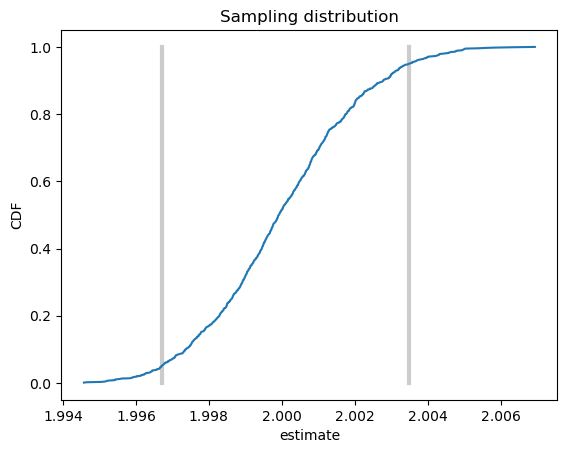

In [26]:
def SimulateSample():
    n=[10,100,1000] 
    iters=1000

    𝜆 = 2

    Ls = []
    Lms = []
    def VertLine(x, y=1):
        plt.plot([x, x], [0, y], color='0.8', linewidth=3)
    
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/𝜆, n)
        L = 1 / np.mean(xs)
        Ls.append(L)
        estimates.append(L)

    stderr = RMSE(estimates, 𝜆)
   
    cdf = Cdf.from_seq(estimates)
    ci = np.percentile(Ls, 5), np.percentile(Ls, 95)
    VertLine(ci[0])
    VertLine(ci[1])
    
    # plot the CDF
    cdf.plot()
    
    plt.xlabel('estimate')
    plt.ylabel('CDF')
    plt.title('Sampling distribution')
    
    return stderr

SimulateSample()

In [27]:
# function time
def lambda_error(n):
    lam = 2
    iters = 1000

    Ls = []

    for _ in range(iters):
        xs = [np.random.exponential(1/lam) for i in range(n)]
        L = 1 / np.mean(xs)
        Ls.append(L)
        estimates.append(L)
        
    Ls = np.array(Ls)
    LDiff = Ls - lam
    LDiff2 = LDiff**2
    RMSE = np.sqrt(np.mean(LDiff2))
        
    return RMSE

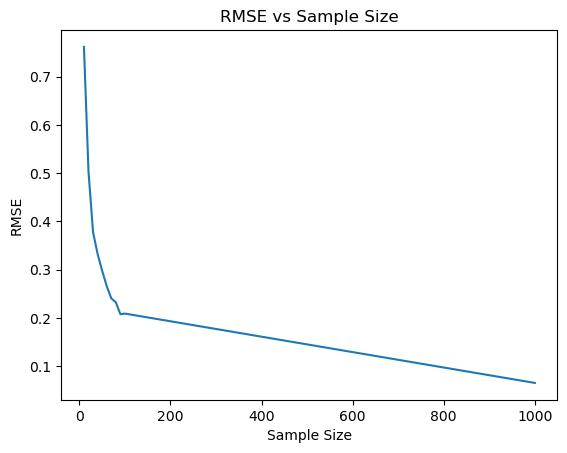

In [28]:
# n ranging from 10-1000
ns = [10,20,30,40,50,60,70,80,90,100,1000]

errors = [lambda_error(n) for n in ns]

plt.plot(ns, errors)
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.title('RMSE vs Sample Size')
plt.show()

In [30]:
n=100 
iters=1000

𝜆 = 2

Ls = []
Lms = []

estimates = []
for _ in range(iters):
    xs = np.random.exponential(1.0/𝜆, n)
    L = 1 / np.mean(xs)
    Ls.append(L)
    estimates.append(L)

# claculate RMSE
print('RMSE L', RMSE(Ls, 𝜆))
# compute the the standard error.
stderr = RMSE(estimates, 𝜆)
print('standard error', stderr)
# compute 90% confidence interval.
ci = np.percentile(Ls, 5), np.percentile(Ls, 95)
print('90 % Confidence Interval:', ci)

RMSE L 0.20388004308101926
standard error 0.20388004308101926
90 % Confidence Interval: (1.6942975374744431, 2.3646628407153334)


In [31]:
n=1000 
iters=1000

𝜆 = 2

Ls = []
Lms = []

estimates = []
for _ in range(iters):
    xs = np.random.exponential(1.0/𝜆, n)
    L = 1 / np.mean(xs)
    Ls.append(L)
    estimates.append(L)

# claculate RMSE
print('RMSE L', RMSE(Ls, 𝜆))
# compute the the standard error.
stderr = RMSE(estimates, 𝜆)
print('standard error', stderr)
# compute 90% confidence interval.
ci = np.percentile(Ls, 5), np.percentile(Ls, 95)
print('90 % Confidence Interval:', ci)

RMSE L 0.06390058516298654
standard error 0.06390058516298654
90 % Confidence Interval: (1.9026623067467487, 2.1152850929793527)


As sample size increases, standard error and the width of the CI decrease:

* 10 -------      0.8 ------    (1.3, 3.5)
* 100 ------      0.20 -------  (1.7, 2.4)
* 1000 -----      0.06 ------   (1.9, 2.1)

All three confidence intervals contain the actual value, 2.